In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('thaiglobal_logistics_data.csv')
df.info()
# df.head()
df['date'] = pd.to_datetime(df['date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30382 entries, 0 to 30381
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   shipment_id              30382 non-null  int64  
 1   date                     30382 non-null  object 
 2   origin                   30382 non-null  object 
 3   destination              30382 non-null  object 
 4   distance_km              30381 non-null  float64
 5   weight_kg                30381 non-null  float64
 6   vehicle_type             30381 non-null  object 
 7   vehicle_age_years        30381 non-null  float64
 8   driver_id                30381 non-null  float64
 9   customer_id              30381 non-null  float64
 10  product_type             30381 non-null  object 
 11  delivery_status          30381 non-null  object 
 12  delay_hours              30381 non-null  float64
 13  transport_cost           30381 non-null  float64
 14  revenue               

In [5]:
# a = df['origin']
# b = df[['origin']]
# print(a.head())
# print(b.head())

## a = df['origin','revenue']
## print(a.head())
# b = df[['origin','revenue']]
# print(b.head())

b = df[['origin','revenue']].copy()
print(b.head())

    origin   revenue
0  Pattaya   2748.14
1  Bangkok  12532.73
2  Pattaya   3750.48
3   Phuket   4572.87
4  Pattaya   1973.51


In [13]:
# df['delivery_status'].value_counts()
# ontime_delivery = df[df['delivery_status'] == 'On Time']
# ontime_delivery.info()

mask = df['delivery_status'] == 'On Time'
a = df[['origin','revenue']].copy()
a['on_time'] = mask
print(a.head())
a.info()

ontime_delivery = df[mask]
ontime_delivery.info()

    origin   revenue  on_time
0  Pattaya   2748.14     True
1  Bangkok  12532.73    False
2  Pattaya   3750.48    False
3   Phuket   4572.87     True
4  Pattaya   1973.51     True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30382 entries, 0 to 30381
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   origin   30382 non-null  object 
 1   revenue  30381 non-null  float64
 2   on_time  30382 non-null  bool   
dtypes: bool(1), float64(1), object(1)
memory usage: 504.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 24365 entries, 0 to 30380
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   shipment_id              24365 non-null  int64         
 1   date                     24365 non-null  datetime64[ns]
 2   origin                   24365 non-null  object        
 3   destination              24365 non-null  obje

In [18]:
# mask1 = df['delivery_status'] == 'On Time'
# mask2 = df['revenue'] > df['revenue'].quantile(0.75)
# a = df[mask1 & mask2]
# print(a.shape)
# a.head()

a = df[(df['delivery_status'] == 'On Time') & (df['revenue'] > df['revenue'].quantile(0.75))]
print(a.shape)
a.head()

(6072, 21)


,shipment_id,date,origin,destination,distance_km,weight_kg,vehicle_type,vehicle_age_years,driver_id,customer_id,...,delivery_status,delay_hours,transport_cost,revenue,customer_satisfaction,fuel_consumption_liters,maintenance_cost,month,estimated_delivery_days,actual_delivery_days
15,16,2022-04-10,Phuket,London,9487.34,258.89,Truck,2.0,110.0,1310.0,...,On Time,0.0,10453.710,12742.53,4.40,958.86,1087.47,4.0,18.2,18.2
18,19,2023-10-24,Khon Kaen,Dubai,5731.44,9.80,Van,8.1,295.0,3555.0,...,On Time,0.0,10703.740,15543.55,4.86,991.94,2775.04,10.0,12.0,12.0
19,20,2022-11-05,Bangkok,Tokyo,6876.69,137.09,Truck,3.6,214.0,5247.0,...,On Time,0.0,13235.208,15073.26,4.07,939.61,1572.37,11.0,14.0,14.0
20,21,2022-12-10,Bangkok,London,6604.09,279.69,Truck,2.4,190.0,8986.0,...,On Time,0.0,10989.048,13292.65,4.47,688.52,616.82,12.0,13.7,13.7
22,23,2023-02-18,Phuket,Tokyo,6353.31,235.68,Airplane,8.7,61.0,728.0,...,On Time,0.0,11857.520,16106.46,4.08,488.93,1791.06,2.0,12.2,12.2


In [26]:
import json

# df[df['vehicle_type'] == 'Truck']['distance_km'].mean()

# dict / list comprehension
avg_distance_vehicle = {vtype: df[df['vehicle_type'] == vtype]['distance_km'].mean()
                               for vtype in df['vehicle_type'].unique()}
print(avg_distance_vehicle)

route_summary = dict()
for origin in df['origin'].unique():
  for destination in df['destination'].unique():
    # key = f'{origin} - {destination}'
    key = '{0} - {1}'.format(origin,destination)
    summary = dict()
    summary['avg_cost'] = df[(df['origin'] == origin) & (df['destination'] == destination)]['transport_cost'].mean()
    summary['avg_revenue'] = df[(df['origin'] == origin) & (df['destination'] == destination)]['revenue'].mean()
    route_summary[key] = summary
print(route_summary)
display(route_summary)
print(json.dumps(route_summary,indent=2))



{'Ship': 5016.046780087382, 'Airplane': 5016.272386199658, 'Truck': 5079.888125164343, 'Van': 5090.875952098961, nan: nan}
{'Pattaya - Tokyo': {'avg_cost': 6858.830769230768, 'avg_revenue': 8456.83162162162}, 'Pattaya - London': {'avg_cost': 6734.537374233129, 'avg_revenue': 8329.748200408998}, 'Pattaya - Sydney': {'avg_cost': 6699.629606621227, 'avg_revenue': 8253.206796494644}, 'Pattaya - New York': {'avg_cost': 6735.2873481624765, 'avg_revenue': 8343.65091876209}, 'Pattaya - Singapore': {'avg_cost': 6703.647040394088, 'avg_revenue': 8269.254532019706}, 'Pattaya - Dubai': {'avg_cost': 6657.368629969418, 'avg_revenue': 8271.711457696229}, 'Pattaya - Sydn': {'avg_cost': nan, 'avg_revenue': nan}, 'Bangkok - Tokyo': {'avg_cost': 6670.084005681818, 'avg_revenue': 8260.539630681818}, 'Bangkok - London': {'avg_cost': 6681.52840860215, 'avg_revenue': 8216.658875855328}, 'Bangkok - Sydney': {'avg_cost': 6908.653434418605, 'avg_revenue': 8537.034920930233}, 'Bangkok - New York': {'avg_cost': 6

{'Pattaya - Tokyo': {'avg_cost': 6858.830769230768,
  'avg_revenue': 8456.83162162162},
 'Pattaya - London': {'avg_cost': 6734.537374233129,
  'avg_revenue': 8329.748200408998},
 'Pattaya - Sydney': {'avg_cost': 6699.629606621227,
  'avg_revenue': 8253.206796494644},
 'Pattaya - New York': {'avg_cost': 6735.2873481624765,
  'avg_revenue': 8343.65091876209},
 'Pattaya - Singapore': {'avg_cost': 6703.647040394088,
  'avg_revenue': 8269.254532019706},
 'Pattaya - Dubai': {'avg_cost': 6657.368629969418,
  'avg_revenue': 8271.711457696229},
 'Pattaya - Sydn': {'avg_cost': nan, 'avg_revenue': nan},
 'Bangkok - Tokyo': {'avg_cost': 6670.084005681818,
  'avg_revenue': 8260.539630681818},
 'Bangkok - London': {'avg_cost': 6681.52840860215,
  'avg_revenue': 8216.658875855328},
 'Bangkok - Sydney': {'avg_cost': 6908.653434418605,
  'avg_revenue': 8537.034920930233},
 'Bangkok - New York': {'avg_cost': 6938.314621513943,
  'avg_revenue': 8473.778695219124},
 'Bangkok - Singapore': {'avg_cost': 681

{
  "Pattaya - Tokyo": {
    "avg_cost": 6858.830769230768,
    "avg_revenue": 8456.83162162162
  },
  "Pattaya - London": {
    "avg_cost": 6734.537374233129,
    "avg_revenue": 8329.748200408998
  },
  "Pattaya - Sydney": {
    "avg_cost": 6699.629606621227,
    "avg_revenue": 8253.206796494644
  },
  "Pattaya - New York": {
    "avg_cost": 6735.2873481624765,
    "avg_revenue": 8343.65091876209
  },
  "Pattaya - Singapore": {
    "avg_cost": 6703.647040394088,
    "avg_revenue": 8269.254532019706
  },
  "Pattaya - Dubai": {
    "avg_cost": 6657.368629969418,
    "avg_revenue": 8271.711457696229
  },
  "Pattaya - Sydn": {
    "avg_cost": NaN,
    "avg_revenue": NaN
  },
  "Bangkok - Tokyo": {
    "avg_cost": 6670.084005681818,
    "avg_revenue": 8260.539630681818
  },
  "Bangkok - London": {
    "avg_cost": 6681.52840860215,
    "avg_revenue": 8216.658875855328
  },
  "Bangkok - Sydney": {
    "avg_cost": 6908.653434418605,
    "avg_revenue": 8537.034920930233
  },
  "Bangkok - New Y

In [37]:
avg_distance_vehicle = {vtype: df[df['vehicle_type'] == vtype]['distance_km'].mean()
                               for vtype in df['vehicle_type'].unique()}
print(avg_distance_vehicle)

vtype_distance = df.groupby(by=['vehicle_type'])['distance_km'].mean()
print(vtype_distance)

vtype_measures = df.groupby(by=['vehicle_type']).agg(
                    {'distance_km':'mean',
                      'revenue':'sum',
                      'origin':pd.Series.mode}
                    )
print(vtype_measures)
print()
vtype_measures.columns = ['avg_distance','total_revenue','most_freq_origin']
print(vtype_measures)

{'Ship': 5016.046780087382, 'Airplane': 5016.272386199658, 'Truck': 5079.888125164343, 'Van': 5090.875952098961, nan: nan}
vehicle_type
Airplane    5016.272386
Ship        5016.046780
Truck       5079.888125
Van         5090.875952
Name: distance_km, dtype: float64
              distance_km      revenue      origin
vehicle_type                                      
Airplane      5016.272386  63589516.21      Phuket
Ship          5016.046780  62992819.97     Bangkok
Truck         5079.888125  64312081.15     Bangkok
Van           5090.875952  64256733.99  Chiang Mai

              avg_distance  total_revenue most_freq_origin
vehicle_type                                              
Airplane       5016.272386    63589516.21           Phuket
Ship           5016.046780    62992819.97          Bangkok
Truck          5079.888125    64312081.15          Bangkok
Van            5090.875952    64256733.99       Chiang Mai


In [44]:
print(df['destination'].unique())
if 'Chula' in df['destination'].unique():
  print('Found')
else:
  print('Not Found')


set_destination = set(df['destination'])
print(set_destination)

if 'Chula' in set_destination:
  print('Found')
else:
  print('Not Found')

set_origin = set(df['origin'])
print(set_origin.union(set_destination))

['Tokyo' 'London' 'Sydney' 'New York' 'Singapore' 'Dubai' 'Sydn']
Not Found
{'Dubai', 'London', 'Singapore', 'Sydn', 'New York', 'Tokyo', 'Sydney'}
Not Found
{'Bangkok', 'Dubai', 'London', 'Singapore', 'Chiang Mai', 'Sydn', 'Phuket', 'Khon Kaen', 'New York', 'Tokyo', 'Pattaya', 'Sydney'}


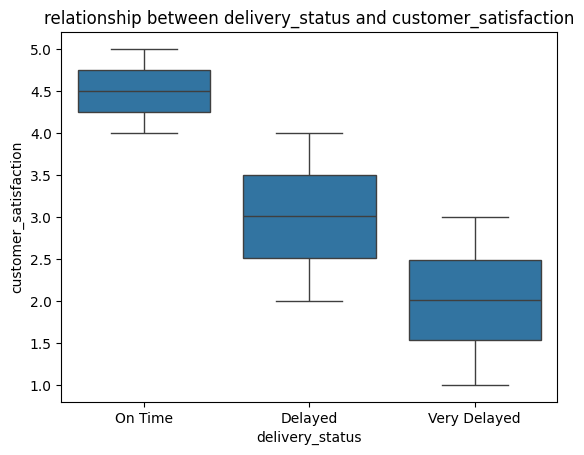

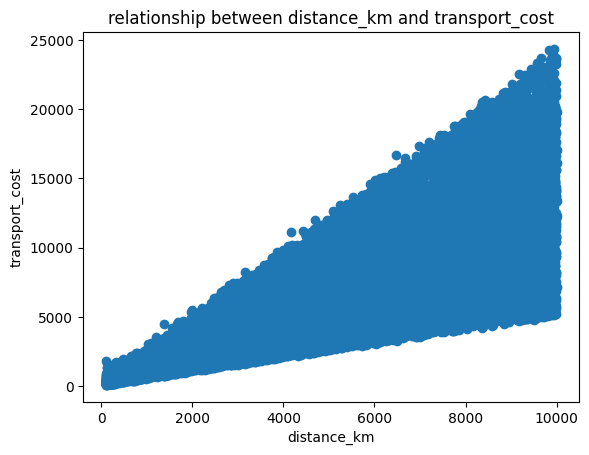

In [51]:
sns.boxplot(x='delivery_status',y='customer_satisfaction',data=df)
plt.title('relationship between delivery_status and customer_satisfaction')
plt.show()

plt.scatter(df['distance_km'],df['transport_cost'])
plt.title('relationship between distance_km and transport_cost')
plt.xlabel('distance_km')
plt.ylabel('transport_cost')
plt.show()

In [57]:
def category_distance(d):
  if d < 1000:
    return 'short'
  elif d < 5000:
    return 'medium'
  else:
    return 'long'

df['distance_category'] = df['distance_km'].apply(category_distance)
print(df[['distance_km','distance_category']].head(10))
print(df[['distance_km','distance_category']].sample(10))

df['profit'] = df.apply(lambda row: (row['revenue'] - row['transport_cost']),axis=1)
print(df[['revenue','transport_cost','profit']].head(10))

   distance_km distance_category
0      1737.89            medium
1      8206.58              long
2      1438.34            medium
3      4271.25            medium
4      1367.44            medium
5       437.70             short
6      8191.13              long
7       415.70             short
8      6651.43              long
9      8259.27              long
       distance_km distance_category
23492      1992.56            medium
927         567.12             short
25558       401.22             short
29318      4583.77            medium
10315      3238.92            medium
23008      7926.85              long
14254      1147.67            medium
6962       6128.34              long
3822       4810.82            medium
10101      7859.09              long
    revenue  transport_cost    profit
0   2748.14        1983.640   764.500
1  12532.73        9021.030  3511.700
2   3750.48        2855.150   895.330
3   4572.87        3714.920   857.950
4   1973.51        1535.690   437.820
5 